# **데이터 수집**

## 네이버 블로그 API로 서울 지역 '카공 추천 카페' 관련 블로그 데이터 수집

In [ ]:
import requests
import re
from datetime import datetime
import pprint
import time

# 네이버 오픈 API 인증 정보
client_id = '3AgZBzo72nWXy102nv0V'
client_secret = 'nCUZjCcted'

# 검색할 키워드 목록
keywords = [
    '서울 카공 추천 카페',
    '서울 카공하기 좋은 카페',
    '서울 공부하기 좋은 카페',
    '서울 조용한 카페'
]

# 요청 헤더 설정
headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# HTML 태그와 특수문자 제거 함수
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = text.replace('&quot;', '"').replace('&amp;', '&')
    return text

# 결과 저장
all_results = []

# 각 키워드마다 200개 이상 수집하기
for query in keywords:
    for start in [1, 101, 201]:  # 1~100, 101~200 수집
        url = 'https://openapi.naver.com/v1/search/blog.json'
        params = {
            'query': query,
            'display': 100,
            'start': start,
            'sort': 'date'
        }

        # API 요청
        response = requests.get(url, headers=headers, params=params)
        time.sleep(0.5)  # 과도한 호출 방지

        if response.status_code == 200:
            items = response.json().get('items', [])
            for item in items:
                title = clean_text(item['title'])
                description = clean_text(item['description'])
                link = item['link']
                post_date = item['postdate']
                post_date = datetime.strptime(post_date, '%Y%m%d').strftime('%Y-%m-%d')

                all_results.append({
                    'keyword': query,
                    'date': post_date,
                    'title': title,
                    'description': description,
                    'link': link
                })
        else:
            print(f"Error {response.status_code}: {response.text}")

# 최종 description 합치기
all_descriptions = ' '.join([result['description'] for result in all_results])

# 결과 출력
print(f"총 {len(all_results)}개의 블로그 글이 수집되었습니다.")
pprint.pprint(all_results)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 {'date': '2025-04-26',
  'description': '예쁜 카페 발견! ️ 라즈베리 로프 케이크 9,800원 아메리카노 디카페인 5,000원 카페라떼 '
                 '5,000원  서울... 감성인테리어, 느좋 외국 카페, 카공하기 좋은 카페 문을 열고 들어가는 순간, '
                 '생각보다 넓은 공간이다.... ',
  'keyword': '서울 카공하기 좋은 카페',
  'link': 'https://blog.naver.com/yjpjl/223846523588',
  'title': '합정역 신상 감성 카페 추천 [로아프하우스]'},
 {'date': '2025-04-26',
  'description': '서울에서 가까운 근교 남양주 카페로 접근성도 좋은데 한강뷰까지 볼 수 있어 남양주로 드라이브하시면서 힐링하고 '
                 '싶을 때 한번 와보시는 추천드려요! '
                 'https://www.instagram.com/city10_company?igsh=M3gzYXQwZGdzcGJt... ',
  'keyword': '서울 카공하기 좋은 카페',
  'link': 'https://blog.naver.com/heejin100463/223846801785',
  'title': '남양주 카페, 한강뷰가 보이는 시티10 카페'},
 {'date': '2025-04-26',
  'description': '엔터하츠 주소: 서울 서초구 동광로 11. 빈센트빌딩 1층. 영업시간: 매일 8:00~22:00  주차불가  '
                 '이수역... 조용하고 카공하기 좋은 카페 엔터하츠 소개드려요. EnterHearts 엔터하츠, 방배동 '
                 '카공카페 스페셜티 커피... ',
  'keyword': '서울 카공하기 좋은 카페',
  'link': 'h

In [ ]:
# link 기준으로 중복 제거
unique_results = {item['link']: item for item in all_results}

# 다시 리스트 형태로 변환
all_results = list(unique_results.values())

print(f"중복 제거 후 남은 블로그 글 수: {len(all_results)}개")

중복 제거 후 남은 블로그 글 수: 1101개


## 네이버 블로그 API로 서울 지역 '스터디카페' 관련 블로그 데이터 수집(중복도 제거)

In [ ]:
import requests
import re
from datetime import datetime
import pprint
import time

# 네이버 오픈 API 인증 정보
client_id = '3AgZBzo72nWXy102nv0V'
client_secret = 'nCUZjCcted'

# 검색할 스터디카페 키워드 목록
study_keywords = [
    '서울 스터디카페 추천',
    '서울 스터디카페 후기',
    '서울 독서실 추천',
    '서울 공부하기 좋은 스터디카페'
]

# 요청 헤더 설정
headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# HTML 태그와 특수문자 제거 함수
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = text.replace('&quot;', '"').replace('&amp;', '&')
    return text

# 결과 저장
study_results = []

# 각 스터디카페 키워드마다 200개 이상 수집하기
for query in study_keywords:
    for start in [1, 101, 201]:  # 1~100, 101~200 수집
        url = 'https://openapi.naver.com/v1/search/blog.json'
        params = {
            'query': query,
            'display': 100,
            'start': start,
            'sort': 'date'
        }

        # API 요청
        response = requests.get(url, headers=headers, params=params)
        time.sleep(0.5)  # 과도한 호출 방지

        if response.status_code == 200:
            items = response.json().get('items', [])
            for item in items:
                title = clean_text(item['title'])
                description = clean_text(item['description'])
                link = item['link']
                post_date = item['postdate']
                post_date = datetime.strptime(post_date, '%Y%m%d').strftime('%Y-%m-%d')

                study_results.append({
                    'keyword': query,
                    'date': post_date,
                    'title': title,
                    'description': description,
                    'link': link
                })
        else:
            print(f"Error {response.status_code}: {response.text}")

# 중복 제거 (link 기준)
unique_study_results = {item['link']: item for item in study_results}
study_results = list(unique_study_results.values())

# 최종 description 합치기
study_descriptions = ' '.join([result['description'] for result in study_results])

# 결과 출력
print(f"총 {len(study_results)}개의 중복 제거된 스터디카페 블로그 글 추출")
pprint.pprint(study_results[:])

총 1016개의 중복 제거된 스터디카페 블로그 글 추출
[{'date': '2025-04-27',
  'description': '공부할 수 있도록 세심하게 신경 썼답니다. 개방감이 좋은 노트북존은, 다른 좌석과 분리되어 소음으로부터 '
                 '최대한 자유로운 자리에 준비되었어요. 넓고 깔끔한 좌석과 인기가 높은 앤딩스터디카페의 의자... ',
  'keyword': '서울 공부하기 좋은 스터디카페',
  'link': 'https://blog.naver.com/andingstudy/223847924461',
  'title': '삼전동 스터디카페 - 앤딩스터디카페 잠실학원사거리점 [서울편]'},
 {'date': '2025-04-27',
  'description': '현재업종 - 추천업종 클리닉, 학원, 스터디카페 등 주차가능여부 가능 총주차대수 32대... '
                 '03(건축물대장기준 - ) 건축물 용도 미등기건물 소재지 서울시 동대문구 이문동 중개사... ',
  'keyword': '서울 스터디카페 추천',
  'link': 'https://blog.naver.com/9692401/223847916068',
  'title': '이문동 단지내상가 104/59㎡ 월세(전체층/3)'},
 {'date': '2025-04-27',
  'description': '날씨가 정말 좋은 요즘, 모처럼 여유롭게 독서모임 장소로 향했다 내가 지금 거주 중인 곳과 매번... 다음 '
                 '모임 때는 미리 어떻게 갈 지 고민해야지 이번 모임 장소는 연희동?에 위치한 스터디 카페 모각 공간... ',
  'keyword': '서울 공부하기 좋은 스터디카페',
  'link': 'https://blog.naver.com/freija88/223847908976',
  'title': '[낭만독서 11기] 4월의 책 - 작별하지 않는다'},
 {'date': '2025-04-27',
  'descri

In [ ]:
!pip install konlpy     # 한국어 형태소 분석기(명사 추출, 형태소 단위로 나누는데 사용)
!pip install wordcloud  # 단어 빈도수 기반의 워드클라우드 이미지 생성 라이브러리

# **데이터 전처리**

# 수집한 데이터 전처리(일반 카페)



In [ ]:
## 텍스트 정제 함수 - 불필요한 문자(HTML 태그, 특수문자, 숫자 등)를 제거하고 분석에 적합한 형태로 텍스트를 깔끔하게 만듦

def clean_text(text):
    # HTML 태그 제거(<b>, <br> 등)
    text = re.sub(r'<.*?>', '', text)
    # 특수 문자 및 숫자 제거(한글, 영어, 공백만 남김)
    text = re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z\s]', '', text)
    # 영어 소문자로 변환(대소문자 동일)
    text = text.lower()
    return text

In [ ]:
## 토큰화 함수 - 텍스트를 한 덩어리로 두지 않고, 의미 있는 단어 단위로 분리

from konlpy.tag import Okt

okt = Okt()  # Okt 형태소 분석기 객체 생성

def tokenize_text(text):
    tokens = okt.morphs(text)   # 텍스트를 형태소(단어 수준)으로 나눔
    return tokens

In [ ]:
## 불용어 제거 함수 - 조사(은, 는, 이), 접속사(와, 과), 흔한 동사(하다) 등 자주 나오지만 의미가 없는 단어들을 제거

stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

def remove_stopwords(tokens):
    meaningful_words = [word for word in tokens if word not in stopwords]
    return meaningful_words

In [ ]:
## 표제어 추출 함수 - 비슷한 의미의 단어들을 한 가지 형태로 통일
def lemmatize_text(text):
    tokens = okt.morphs(text, stem=True)
    return tokens

In [ ]:
## 분석에 필요한 핵심 단어만 뽑아내기 위해(위에 전처리를 한번에 실행)
## 위에서 각각 전처리 했으므로 필요없지만 아래 테스트를 간단히 하기 위해 실행

def preprocess_text(text):
    text = clean_text(text)            # 1단계: HTML, 특수문자, 숫자 제거 등 텍스트 정제
    tokens = tokenize_text(text)       # 2단계: 문장을 단어 단위로 나누기 (토큰화)
    tokens = remove_stopwords(tokens)  # 3단계: 불필요한 단어(불용어) 제거
    return tokens

# 수집한 데이터 전처리(스터디카페)



In [ ]:
import re
from konlpy.tag import Okt

# 1. 텍스트 정제 함수
def clean_text_study(text):
    text = re.sub(r'<.*?>', '', text)  # HTML 태그 제거
    text = re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z\s]', '', text)  # 특수문자 및 숫자 제거
    text = text.lower()  # 영어는 소문자로
    return text

# 2. 토큰화 함수
okt = Okt()  # 형태소 분석기 객체 생성

def tokenize_text_study(text):
    tokens = okt.morphs(text)  # 형태소(단어) 단위로 나누기
    return tokens

# 3. 불용어 제거 함수
stopwords_study = [
    '의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다',
    '스터디', '카페', '공부', '추천', '후기', '이용', '시간', '가능', '위치', '시설', '느낌', '정도', '조용', '공간'
]

def remove_stopwords_study(tokens):
    meaningful_words = [word for word in tokens if word not in stopwords_study]
    return meaningful_words

In [ ]:
# 1단계: 텍스트 정제
cleaned_text = clean_text_study(study_descriptions)

# 2단계: 토큰화
tokens = tokenize_text_study(cleaned_text)

# 3단계: 불용어 제거
final_tokens = remove_stopwords_study(tokens)

print(f"최종 전처리된 단어 수: {len(final_tokens)}개")
print(final_tokens[:100])

최종 전처리된 단어 수: 31616개
['할', '수', '있도록', '세심', '하게', '신경', '썼답니다', '개방', '감', '좋은', '노트북', '존', '다른', '좌석', '분리', '되어', '소음', '으로부터', '최대한', '자유로운', '자리', '준비', '되었어요', '넓고', '깔끔한', '좌석', '인기', '높은', '앤딩', '의자', '현재', '업종', '업종', '클리', '닉', '학원', '등', '주차', '여부', '총', '주차', '대수', '대', '건축물', '대장', '기준', '건축물', '용도', '미', '등기', '건물', '소재지', '서울시', '동대문구', '이문동', '중개사', '날씨', '정말', '좋은', '요즘', '모처럼', '여유롭게', '독서', '모임', '장소', '로', '향', '했다', '내', '지금', '거주', '중인', '곳', '매번', '다음', '모임', '때', '미리', '어떻게', '갈', '지', '고민', '해야지', '이번', '모임', '장소', '연희동', '모각', '보낸', '남겨', '보려고', '한다', '넛', '지스', 'nudges', '북카페', '서울', '동대문구', '답십리로', '길']


## 전처리 테스트(일반 카페)

In [ ]:
## 전처리 함수 테스트 해보기

original_text = "안녕하세요! 반갑습니다. 캡스톤디자인 설계 수업입니다."

processed_text = preprocess_text(original_text)  # 전처리 함수 적용

print("원본 텍스트:", original_text)
print("전처리된 텍스트:", processed_text)

원본 텍스트: 안녕하세요! 반갑습니다. 캡스톤디자인 설계 수업입니다.
전처리된 텍스트: ['안녕하세요', '반갑습니다', '캡', '스톤', '디자인', '설계', '수업', '입니다']


In [ ]:
## 전처리 전후의 텍스트 길이 차이 확인

original_length = len(original_text)              # 전처리 전 텍스트의 문자 수 길이
processed_length = len(' '.join(processed_text))  # 전처리된 텍스트는 토큰 리스트이므로 ''.join()을 이용해 문장 형태로 다시 합친 후 길이 측정

print(f"전처리 전 길이: {original_length}, 전처리 후 길이: {processed_length}")


전처리 전 길이: 30, 전처리 후 길이: 30


In [ ]:
## 전처리 이후에도 숫자가 남아있는지 확인

if re.search(r'\d+', ' '.join(processed_text)):
    print("숫자가 아직 남아 있습니다.")   # 숫자가 하나라도 남아 있다면 출력
else:
    print("숫자가 모두 제거되었습니다.")  # 숫자가 전부 제거되었다면 출력

숫자가 모두 제거되었습니다.


In [ ]:
## 전처리 이후 stopwords 리스트에 불용어가 남아있는지 확인

remaining_stopwords = [word for word in processed_text if word in stopwords]

if remaining_stopwords:
    print(f"제거되지 않은 불용어: {remaining_stopwords}")  # 남아있는 불용어가 있다면 출력
else:
    print("모든 불용어가 제거되었습니다.")


모든 불용어가 제거되었습니다.


# **데이터 분석**

## 텍스트 마이닝으로 키워드 추출 및 빈도 분석(일반 카페)

In [ ]:
## 빈도 기반 키워드 분석

from collections import Counter  # 단어 빈도수를 세기 위한 라이브러리

# 예시 - 각 블로그 글에서 추출한 주요 키워드라고 가정
processed_texts = [
    ['카페', '조용', '분위기'],
    ['스터디', '카페', '콘센트'],
    ['콘센트', '카페', '조용'],
    ['공부', '카페', '주차']
]

# 모든 단어를 하나의 리스트로
all_words = [word for text in processed_texts for word in text]

# 단어 빈도 계산
word_counts = Counter(all_words)

# 가장 빈도가 높은 상위 20개 단어 추출
top_20_words = word_counts.most_common(20)

# 결과 출력
for word, freq in top_20_words:
    print(f'{word}: {freq}')

카페: 4
조용: 2
콘센트: 2
분위기: 1
스터디: 1
공부: 1
주차: 1


In [ ]:
## 텍스트 마이닝을 통해 자주 언급한 키워드를 추출, 그 빈도를 분석(핵심)

from konlpy.tag import Okt
from collections import Counter

# 형태소 분석기 Okt 객체 생성
okt = Okt()

# 수집한 블로그 글에서 본문(description)만 추출
descriptions = [item['description'] for item in all_results]

# 각 description에서 명사만 추출해 하나의 리스트로 모음
all_nouns = []
for desc in descriptions:
    nouns = okt.nouns(desc)   # 명사 추출
    all_nouns.extend(nouns)   # 전체 명사 리스트에 추가

# 불용어 리스트 정의(너무 흔하거나 의미 없는 단어들)
stopwords = [
    '카페', '서울', '추천', '정도', '이용', '위치', '사용', '시간','무조건', '회기역', '통화',
    '정말', '좋아요', '너무', '많이', '곳', '보기', '신논현역', '구월동', '필드','다가',
    '오늘', '사진', '방문', '리뷰', '후기', '제일', '매장','레전드', '어찌','안쪽','종종',
    '같아요', '느낌', '이런', '저런', '생각', '일단', '사람','동대문구','전날', '매우', '기동',
    '가능', '보니', '그리고', '근처', '조금', '항상', '이번','저희', '샤브샤브','공릉', '냉장고',
    '자체', '정도', '계속', '약간', '하고', '하면', '해서', '강남역', '강남구','거리','부산',
    '하나', '누구', '우리', '다음', '이제', '여기', '다리', '여기', '합정동', '써니', '대부분', '수유',
    '기분', '정리', '소개', '이름', '번호', '구역', '데이', '진짜', '루프', '요즘', '블랙', '사이',
    '위치', '요즘', '약간', '진짜', '정도', '간다', '과천', '가기', '건대', '강남', '강남구', '강남역',
    '건대입구', '홍대', '합정동광장', '삼성역', '이대', '마포구', '서울대', '이화여대',
    '자대문구', '종로구', '구역', '동네', '광장', '근처', '지역', '지하', '다리', '주변',
    '연인', '누구', '우리',  '소개', '이름', '아기', '엄마', '셀렉','산책', '코스',
    '기분', '느낌', '정말', '항상', '조금', '약간', '진짜', '생각', '하하', '하루', '정리',
    '요즘', '오늘', '이번', '다음', '이제', '시간', '오후','날씨','독서실','웨이',
    '이용', '사용', '주소', '번호', '사진', '후기', '방문', '추천', '제일', '매장',
    '위치', '소개', '정보', '정도', '상품', '정리', '소개', '기도','세종시', '미인',
    '써니', '데이', '블랙', '티드', '닉스', '투썸', '루프', '거나', '데이트', '모두',
    '하나', '수다', '무엇', '학교', '구역', '경험', '회의', '모든', '우선', '진심',
    '시작', '우유', '자주', '사용', '최고', '자연', '접근성', '느낌', '성수', '강남',
    '월요일', '여름', '노홍', '스카', '오픈', '주소', '사실', '가기','안산', '오예',
    '공간', '오늘', '소개', '공부', '자리', '작업', '역시', '정말', '진짜', '약간',
    '그냥', '이런', '저런', '엄마', '우리', '가족', '수업', '여행', '기억', '문화',
    '기간', '학생', '교수', '입구', '사진', '제일', '후기', '예전', '마음', '바로',
    '선물', '완전', '평일', '주말', '요즘', '딸', '엄마', '테헤란로', '서울대',
    '연대', '동대문', '압구정', '강남구', '강남역', '성수동', '라운지', '노벤버'
]
# 불용어 제거 + 길이가 1 이상인 단어만 남김
filtered_nouns = [word for word in all_nouns if word not in stopwords and len(word) > 1]

# 단어 빈도 계산
word_counts = Counter(filtered_nouns)
top_20_words = word_counts.most_common(20)

# 결과 출력
for word, freq in top_20_words:
    print(f'{word}: {freq}')


카공: 299
분위기: 187
커피: 154
영업: 110
맛집: 91
디저트: 91
매일: 55
감성: 53
혼자: 49
출구: 48
친구: 47
대형: 47
내부: 44
테이블: 41
주차: 40
노트북: 40
메뉴: 39
베이커리: 38
스터디: 37
장소: 35


# 결과

## 키워드 분석 기반, 카페 러너의 선호 조건 파악 및 해석

In [ ]:
# 카공 (297회): 카페에서 공부나 작업하는 공간 활용을 의미, 공부하기 좋은 환경 선호
# 분위기 (188회): 조용하고 편안한 분위기를 중요시함
# 커피 (154회): 맛있고 질 좋은 커피 제공이 필수 요소
# 영업 (107회): 긴 영업시간과 안정적인 운영이 선호됨
# 디저트 (94회): 질 좋은 디저트가 함께 제공되는 카페 선호
# 맛집 (89회): 음식과 음료가 맛있는 카페를 찾는 경향
# 매일 (54회): 매일 방문해도 편안한 카페를 원함
# 감성 (54회): 감성적인 인테리어와 분위기가 중요
# 대형 (52회): 넓고 쾌적한 대형 공간을 선호
# 출구 (50회): 지하철 출구와 가까운 위치가 중요
# 혼자 (50회): 혼자 공부하거나 작업하기 좋은 공간을 선호
# 주차 (46회): 차량 이용 시 편리한 주차 공간 확보가 필요
# 친구 (46회): 친구와 함께 공부하거나 모일 수 있는 공간 선호
# 내부 (43회): 내부 인테리어와 청결도 중요하게 고려
# 노트북 (39회): 노트북 사용이 자유로운 환경이 필수
# 테이블 (39회): 넉넉하고 작업하기 좋은 테이블이 필요
# 메뉴 (37회): 다양한 메뉴 선택지가 있는 카페를 선호
# 베이커리 (36회): 신선한 빵과 디저트를 제공하는 곳 선호
# 장소 (35회): 접근성 좋은 위치의 카페가 인기
# 스터디 (35회): 스터디 모임이 가능한 조용하고 편한 공간 필요

# 공부와 작업에 적합한 공간: 조용하고 넓은 카페, 안정적인 테이블 배치로 집중 가능한 환경
# 노트북과 콘센트 사용 가능: 노트북 사용이 자유롭고 전원 이용이 편리한 카페 선호
# 스터디와 혼자 공부 가능: 혼자 공부하거나 스터디 모임 모두 가능한 공간 구성
# 편리한 위치와 주차 가능: 접근성이 좋고, 차량 이용 시 주차가 가능한 카페 선호
# 감성적이면서 실용적인 분위기: 감성적인 인테리어와 청결한 내부를 갖춘 쾌적한 카페
# 영업시간과 좌석 여유: 긴 영업시간과 항상 여유 좌석이 확보된 곳 선호

## 텍스트 마이닝 분석(스터디카페)

In [ ]:
from konlpy.tag import Okt
from collections import Counter

# 형태소 분석기 Okt 객체 생성
okt = Okt()

# 스터디카페 블로그 글에서 본문(description)만 추출
study_descriptions = [item['description'] for item in study_results]

# 각 description에서 명사만 추출해 하나의 리스트로 모음
study_all_nouns = []
for desc in study_descriptions:
    nouns = okt.nouns(desc)   # 명사 추출
    study_all_nouns.extend(nouns)   # 전체 명사 리스트에 추가

# 불용어 리스트 (기존에 사용한 리스트 그대로 사용)
stopwords = [
    '카페', '서울', '추천', '정도', '이용', '위치', '사용', '시간','무조건', '회기역', '통화',
    '정말', '좋아요', '너무', '많이', '곳', '보기', '신논현역', '구월동', '필드','다가',
    '오늘', '사진', '방문', '리뷰', '후기', '제일', '매장','레전드', '어찌','안쪽','종종',
    '같아요', '느낌', '이런', '저런', '생각', '일단', '사람','동대문구','전날', '매우', '기동',
    '가능', '보니', '그리고', '근처', '조금', '항상', '이번','저희', '샤브샤브','공릉', '냉장고',
    '자체', '정도', '계속', '약간', '하고', '하면', '해서', '강남역', '강남구','거리','부산','디저트',
    '하나', '누구', '우리', '다음', '이제', '여기', '다리', '여기', '합정동', '써니', '대부분', '수유',
    '기분', '정리', '소개', '이름', '번호', '구역', '데이', '진짜', '루프', '요즘', '블랙', '사이',
    '위치', '요즘', '약간', '진짜', '정도', '간다', '과천', '가기', '건대', '강남', '강남구', '강남역',
    '건대입구', '홍대', '합정동광장', '삼성역', '이대', '마포구', '서울대', '이화여대','스터디','수도권',
    '자대문구', '종로구', '구역', '동네', '광장', '근처', '지역', '지하', '다리', '주변','모임', '교육',
    '연인', '누구', '우리',  '소개', '이름', '아기', '엄마', '셀렉','산책', '코스','서울특별시','신촌',
    '기분', '느낌', '정말', '항상', '조금', '약간', '진짜', '생각', '하하', '하루', '정리','친구', '북카페',
    '요즘', '오늘', '이번', '다음', '이제', '시간', '오후','날씨','독서실','웨이','부동산','덕분', '방법',
    '이용', '사용', '주소', '번호', '사진', '후기', '방문', '추천', '제일', '매장','공유', '회사','하우스',
    '위치', '소개', '정보', '정도', '상품', '정리', '소개', '기도','세종시', '미인','장소', '사우나', '잠실',
    '써니', '데이', '블랙', '티드', '닉스', '투썸', '루프', '거나', '데이트', '모두','학습', '면접', '서초구',
    '하나', '수다', '무엇', '학교', '구역', '경험', '회의', '모든', '우선', '진심','게스트하우스', '가장',
    '시작', '우유', '자주', '사용', '최고', '자연', '접근성', '느낌', '성수', '강남','골프', '생활', '공원', '서울시',
    '월요일', '여름', '노홍', '스카', '오픈', '주소', '사실', '가기','안산', '오예', '주민', '실내', '매물',
    '공간', '오늘', '소개', '공부', '자리', '작업', '역시', '정말', '진짜', '약간','단지', '키즈', '연습장', '호선',
    '그냥', '이런', '저런', '엄마', '우리', '가족', '수업', '여행', '기억', '문화','커뮤니티', '피트니스', '커피',
    '기간', '학생', '교수', '입구', '사진', '제일', '후기', '예전', '마음', '바로','창업', '아파트', '준비',
    '선물', '완전', '평일', '주말', '요즘', '딸', '엄마', '테헤란로', '서울대','학원', '저녁', '제공', '맛집',
    '연대', '동대문', '압구정', '강남구', '강남역', '성수동', '라운지', '노벤버', '센터', '영어', '도서관'
]

# 불용어 제거 + 길이가 1 이상인 단어만 남기기
study_filtered_nouns = [word for word in study_all_nouns if word not in stopwords and len(word) > 1]

# 단어 빈도 계산
study_word_counts = Counter(study_filtered_nouns)
study_top_20_words = study_word_counts.most_common(20)

# 결과 출력
print("스터디카페 상위 20개 키워드")
for word, freq in study_top_20_words:
    print(f'{word}: {freq}')


스터디카페 상위 20개 키워드
시설: 102
분위기: 55
집중: 49
대형: 46
영업: 43
시험: 40
운영: 39
환경: 38
매일: 35
도보: 33
인테리어: 32
노트북: 31
출구: 29
편의: 25
관리: 24
주차: 23
교통: 23
업무: 23
좌석: 22
개인: 22


## 해석

In [ ]:
# 1. 공부와 업무에 최적화된 공간
# 시설 (102회): 최신 시설과 깔끔한 공간 관리가 필수
# 집중 (52회): 공부나 업무에 몰입할 수 있는 환경 최우선
# 환경 (38회): 학습에 최적화된 조용하고 편안한 환경 중시
# 시험 (39회): 각종 시험 준비를 위해 최적화된 공간 선호
# 업무 (23회): 업무 관련 작업(문서 작성, 회의 등) 가능
# → 집중과 몰입을 위한 조용하고 깔끔한 공간이 필수적

# 2. 노트북과 전원 사용의 자유로움
# 노트북 (30회): 노트북 사용이 자유롭고 전원(콘센트) 접근성 중요
# 편의 (25회): 프린터, 화장실 등 편의시설 완비 중요
# → 전자기기 사용이 자유로운 환경 요구

# 3. 넓고 쾌적한 대형 공간 선호
# 대형 (47회): 넓고 쾌적한 대형 공간을 선호
# 테이블 (21회): 편안하고 공부하기 좋은 테이블 중요
# → 답답하지 않고 여유로운 좌석 배치 선호

# 4. 뛰어난 접근성과 교통 편의성
# 도보 (32회): 지하철역 등 도보 이동 가능한 위치 선호
# 출구 (28회): 지하철 출구와 매우 가까운 곳 선호
# 교통 (23회): 대중교통 접근성 중요
# 주차 (22회): 차량 이용자 고려한 주차 공간 필요
# → 대중교통과 차량 모두 접근성 좋은 위치 선호

# 5. 관리가 잘 되는 청결한 공간
# 운영 (40회): 체계적이고 안정적인 운영 필요
# 관리 (24회): 철저한 청결과 시설 관리 중요
# 인테리어 (32회): 깔끔하고 현대적인 인테리어 선호
# → 청결, 시설 관리, 운영 안정성을 매우 중시

# 6. 장기 이용을 고려한 매일 이용 가능성
# 매일 (35회): 매일 방문해도 피로감 없는 환경 필요
# 영업 (43회): 긴 영업시간(24시간 운영 등) 선호
# → 지속적이고 편안한 이용이 가능한 환경 선호

# **시각화**

## 카페 러너가 선호하는 조건에 대한 분석 결과를 시각화

In [ ]:
import matplotlib.pyplot as plt  # 시각화 라이브러리

!apt-get update -qq   # 패키지 목록 최신화
!apt-get install -y fonts-nanum  # 나눔글꼴 설치(한글 깨짐 방지)

import matplotlib.font_manager as fm  # 폰트 설정을 위한 모듈
plt.rc('font', family='NanumGothic')  # 그래프에서 한글이 보이도록 나눔고딕 폰드 적용

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


워드 클라우드(word cloud)

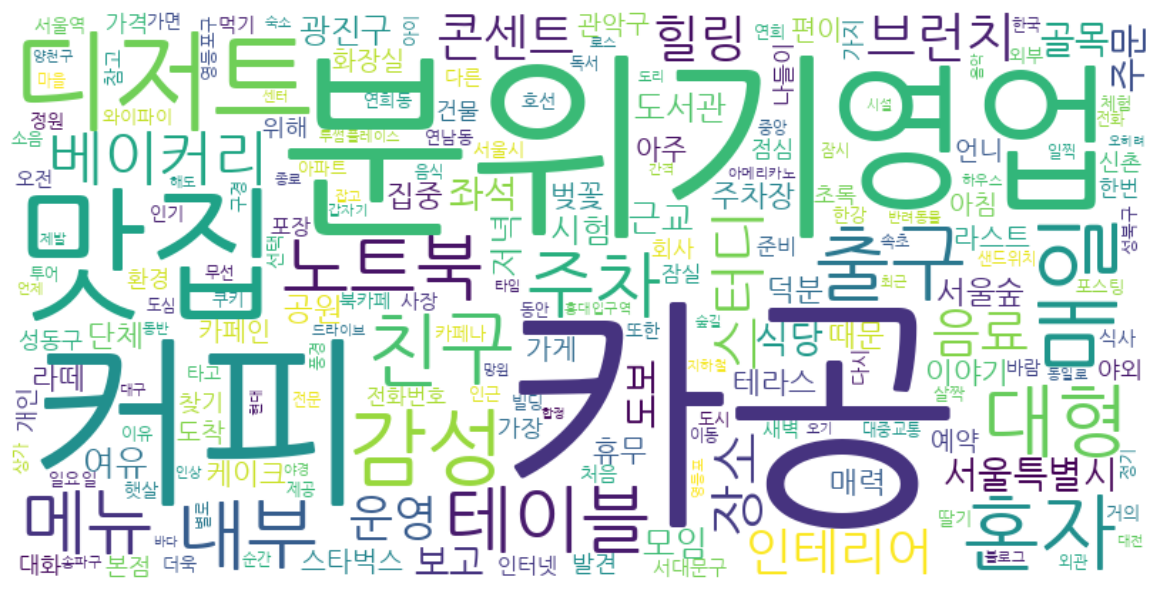

In [ ]:
from wordcloud import WordCloud  # 워드클라우드 생성 라이브러리

# 워드클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic.ttf',                      # 한글이 깨지지 않도록 한글 폰트 지정
                      background_color='white',                         # 배경색 흰색으로 지정
                      width=800,                                        # 이미지 너비
                      height=400                                        # 이미지 높이
                      ).generate_from_frequencies(word_counts)          # 단어 빈도 정보로 워드클라우드 생성

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))                         # 출력 이미지 크기 설정
plt.imshow(wordcloud, interpolation='bilinear')     # 워드 클라우드 이미지 출력
plt.axis('off')                                     # 축 숨기기
plt.tight_layout()                                  # 레이아웃 정리
plt.show()                                          # 그래프 출력

bar graph

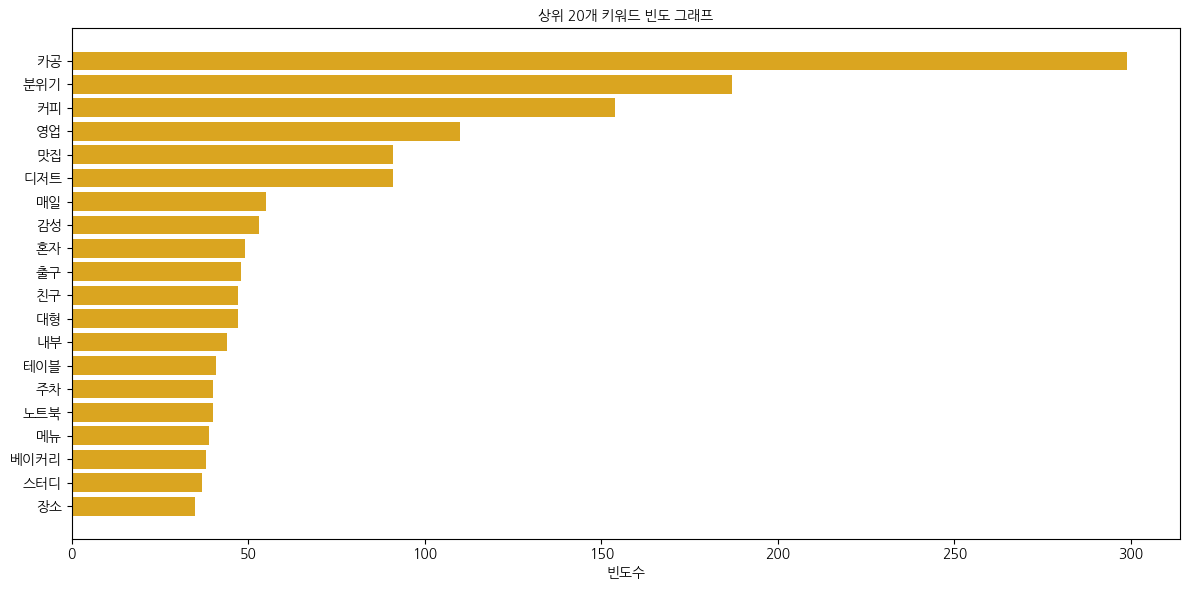

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 나눔고딕 폰트 경로 설정(한글 깨짐 방지)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 단어 빈도 상위 20개 추출
top_words = word_counts.most_common(20)       # (단어, 빈도) 튜플 리스트
words = [word for word, count in top_words]   # 단어만 추출
counts = [count for word, count in top_words] # 빈도수만 추출

# 바 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.barh(words[::-1], counts[::-1], color='goldenrod')  # 수평 막대그래프, 가장 큰 값이 위에 오도록

# 그래프에 텍스트, 축에 한글 폰트 적용
plt.xlabel('빈도수', fontproperties=font_prop)     # x축 라벨
plt.title('상위 20개 키워드 빈도 그래프', fontproperties=font_prop)   # 그래프 제목
plt.xticks(fontproperties=font_prop)   # x축 눈금에 폰트 적용
plt.yticks(fontproperties=font_prop)   # y축 눈금에 폰트 적용

# 레이아웃 정리 + 그래프 출력
plt.tight_layout()
plt.show()

# 벤다이어그램(일반 카페 vs 스터디 카페 키워드 시각화)

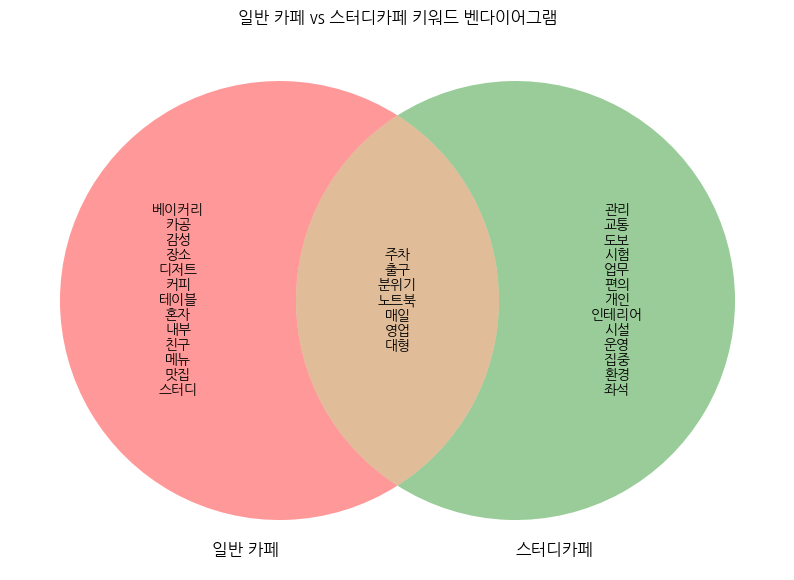

In [ ]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# 일반 카페와 스터디카페 각각 키워드 top 20 리스트
cafe_keywords = [word for word, _ in top_20_words]
study_cafe_keywords = [word for word, _ in study_top_20_words]

# 두 집합 만들기
set_cafe = set(cafe_keywords)
set_study_cafe = set(study_cafe_keywords)

# 벤다이어그램 그리기
plt.figure(figsize=(10, 8))
venn = venn2([set_cafe, set_study_cafe], set_labels=('일반 카페', '스터디카페'))

# 각 영역에 텍스트 직접 넣기
# 일반 카페에만 있는 키워드
if venn.get_label_by_id('10'):
    venn.get_label_by_id('10').set_text('\n'.join(set_cafe - set_study_cafe))

# 스터디카페에만 있는 키워드
if venn.get_label_by_id('01'):
    venn.get_label_by_id('01').set_text('\n'.join(set_study_cafe - set_cafe))

# 공통 키워드
if venn.get_label_by_id('11'):
    venn.get_label_by_id('11').set_text('\n'.join(set_cafe & set_study_cafe))

plt.title('일반 카페 vs 스터디카페 키워드 벤다이어그램')
plt.show()

## 벤다이어그램 해석

In [ ]:
# - 일반 카페
# 감성과 맛, 여유를 중시함
# "커피", "디저트", "맛집", "감성", "베이커리", "친구", "혼자" 같은 키워드가 많음
# 먹거리와 분위기, 편하게 머물 수 있는 공간을 중요하게 여김

# - 스터디카페는
# 효율적 공부와 업무에 최적화된 환경을 중시함
# "집중", "시설", "운영", "시험", "환경", "업무" 같은 키워드가 강조됨
# 학습/업무 몰입 환경과 편의성, 운영 안정성을 더 중요시

# -- 공통 키워드 (ex. "영업", "대형", "출구", "노트북" 등)는
# 편리성이나 기본적인 공간 품질을 양쪽 모두 중요하게 여긴다는 점을 보여줌

# 일반 카페는 "맛과 감성, 여유"를, 스터디카페는 "집중과 효율, 편의성"을 중심으로 이용 목적과 선호 키워드가 다르다!!

## 직접 키워드를 정해서 빈도 출력

In [ ]:
##  관심 있는 핵심 키워들에 대해 빈도 출력
focus_keywords = ['조명', '소음', '콘센트', '좌석', '노트북', '공간', '분위기', '조용', '와이파이', '공부', '주차', '충전']

# 전체 단어 빈도 중, 관심 키워드만 추출해서 보여주기
for word in focus_keywords:                       # 관심 있는 각 키워드에 대해
    print(f'{word}: {word_counts.get(word, 0)}')  # 해당 키워드의 빈도를 출력, 만약 키워드가 없다면 0 출력

조명: 4
소음: 11
콘센트: 28
좌석: 27
노트북: 40
공간: 0
분위기: 187
조용: 0
와이파이: 12
공부: 0
주차: 40
충전: 8


In [ ]:
## 관심 키워드가 들어간 문장만 필터링
focus_keywords = ['조명', '소음', '콘센트', '노트북', '분위기', '와이파이']
filtered_sentences = []  # 필터링된 문장들을 저장할 리스트

# 모든 블로그 결과를 순회하면서, 본문에서 관심 키워드가 포함된 문장만 추출
for result in all_results:
    text = result['description']
    for keyword in focus_keywords:   # 관심 키워드 목록을 하나씩 확인
        if keyword in text:      # 텍스트에 관심 키워드가 포함되
            filtered_sentences.append((keyword, text))    # 해당 키워드와 문장을 튜플로 저장
            break  # 한 문장에 여러 키워드가 있어도 하나만 추가

# 출력 예시
for keyword, sentence in filtered_sentences[:30]:   # 필터링된 문장 중 처음 30개 출력
    print(f"[{keyword}] {sentence}")  # 키워드와 문장 출력

[노트북] #합정카페 #합정역카페 #합정노트북카페 #합정노트북하기좋은카페 #합정공부카페 #합정역공부카페... 합정야외카페 #합정애견동반카페 #합정아늑한카페 #서울애견동반카페 #애견동반카페추천 #합정커피맛집... 
[분위기] 또 서울 분위기가 넘 좋았는데 맛이 아쉬웠음 ㅜ …. 소개팅 하면 좋겠다 ~ 했는데 실제로 뒤에서 ing 흥미로와 날씨가 구렸음 아무곳이나 들어갔는데 참 ㄱㅊ았던 카페 #카페오이이 아리따운 아갓씨와 /// 간술도... 
[분위기] 무엇보다 조용한 분위기여서 도란도란 이야기하기 좋았고 소개팅이나 데이트 장소로도 좋을 거... 2022 카페박스 셀렉션 커피 맛집, 서울카페쇼 공식 파트너샵이래요. 원두랑 드립백도 판매하고 있어요... 
[콘센트] 전반적으로 조용한 편이라 공부, 노트북 작업, 미팅 모두에 적합해 보였고, 콘센트가 거의 모든... #종각카페 #을지로카페 #카공카페 #할리스청계천점 #종각카공 #서울카페추천 #혼카페 #공부하기좋은카페... 
[분위기] 깔끔하고 조용한 분위기라 하루종일 조용히 할 일을 마무리하는 시간을 보낼 수 있다. 양천구 목동에... 리뷰쓰기 #리뷰노트 #서울공유오피스1인실 #서울공유오피스가격 #스터디카페 #공유오피스추천 #대학생창업
[노트북] 카페에서 공부,일 ㅋㅋ) 오 방금 알게된건데 이게 광주에도 있네요? 너무너무 제스타일이던데 다른 지역 지점들도 이렇게 돼있을지 다음에 가봐야겠어요 어쨌든 여기도 제 친구 픽으로, 노트북 작업하기 좋은곳... 
[노트북] 오늘은 서울 잠실역에서 업무가 있어서 일하러 온김에 끝나고 대학원 시험 대비 공부를 하러 주변에서 카공하기 좋은 카페에 방문했습니다. 서울 잠실역 카공 노트북 카페 앙떼띠 추천 포스팅 시작하겠습니다!... 
[노트북] 8층은 그룹스터디나, 노트북 작업을 하기 좋은 장소로 카공하기 좋는 곳입니다. 평일은 오후5시... 강남카페 #강남디저트 #강남포토존 #강남갤러리카페 #티라미수맛집 #루프탑카페 #강남뷰맛집 #강남핫플 #서울카페
[분위기] [네이버 지도] 작심스터

In [ ]:
!fc-list | grep Nanum

/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGothic,나눔바른고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf: NanumGothic,나눔고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf: NanumSquare,나눔스퀘어:style=Regular
/us

In [ ]:
# 나눔폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

# 런타임에 폰트 경로 등록
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import os

# 설치된 나눔폰트 경로 확인 및 설정
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

# 기본 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
desc_nouns_list = []
for desc in descriptions:
    nouns = [word for word in okt.nouns(desc) if word not in stopwords and len(word) > 1]
    desc_nouns_list.append(nouns)

In [ ]:
import platform

# 플랫폼별 폰트 이름 설정
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'
else:
    font_name = 'NanumGothic'

## Co-occurrence Network을 사용해 자주 같이 나오는 키워드 연관성 확인

상위 20개 키워드 기반 연관 키워드 네트워크

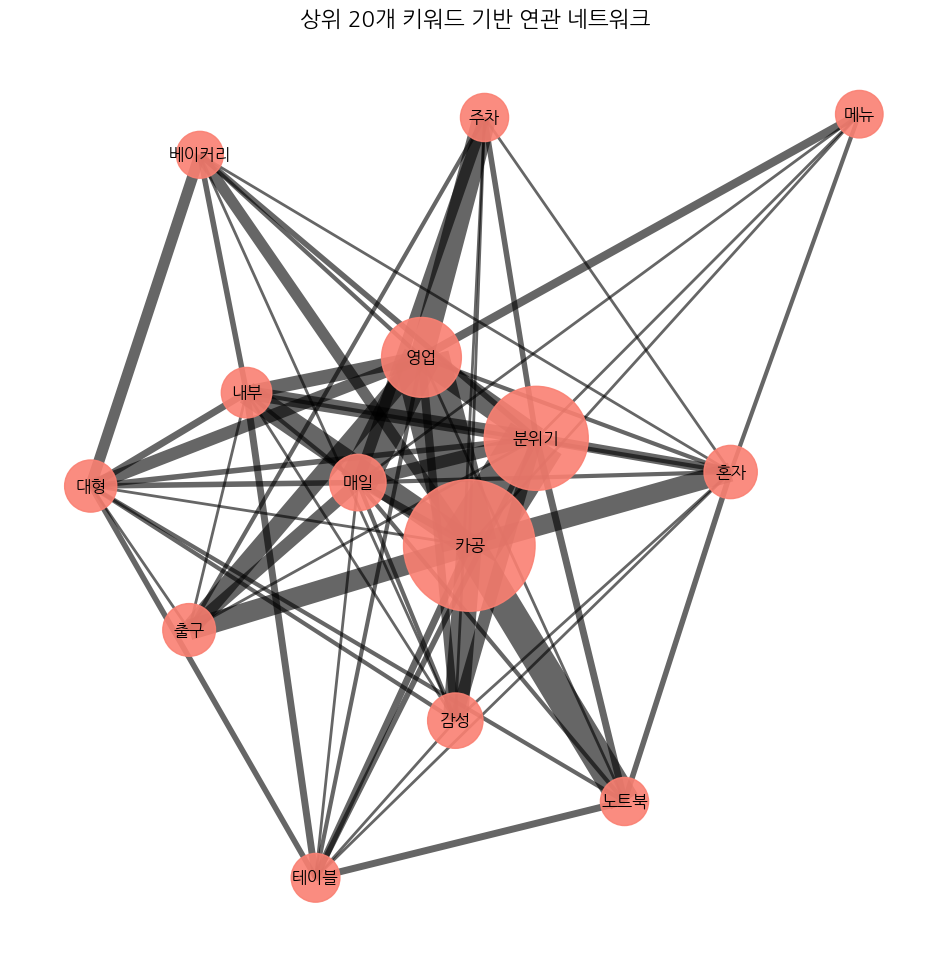

In [ ]:
## 바그래프에서 추출한 상위 20개 키워드 기반 연관 키워드 네트워크

import networkx as nx
from itertools import combinations

# 단어 빈도 기준 상위 20개 키워드만 추출
top_words = [word for word, count in word_counts.most_common(20)]

# 각 문서의 명사 리스트에서 상위 20개 키워드만 필터링하여 단어쌍(조합) 생성
top_edges = []
for nouns in desc_nouns_list:
    filtered_nouns = set([n for n in nouns if n in top_words])  # 상위 키워드만 남기기
    top_edges += list(combinations(filtered_nouns, 2))  # 중복 없는 단어쌍 생성

# 생성된 단어쌍의 출현 횟수를 세고, 2번 이상 함께 등장한 쌍만 필터링
top_edge_counts = Counter(top_edges)  # (단어1, 단어2): 등장횟수 형태의 딕셔너리
top_filtered_edges = {k: v for k, v in top_edge_counts.items() if v >= 2}  # 2회 이상만 사용

# 네트워크 그래프 객체 생성
G_top = nx.Graph()
for (n1, n2), v in top_filtered_edges.items():
    G_top.add_edge(n1, n2, weight=v)

# 노드 크기 설정: 각 단어의 전체 등장 빈도수에 비례하여 크기 지정
top_node_sizes = [word_counts.get(node, 1) * 30 for node in G_top.nodes()]

# 네트워크 시각화
plt.figure(figsize=(12, 12))  # 그래프 크기 설정
pos = nx.spring_layout(G_top, k=0.5, seed=42)  # 노드 위치 자동 배치

# 노드(단어) 그리기
nx.draw_networkx_nodes(G_top, pos, node_size=top_node_sizes, node_color='salmon', alpha=0.9)

# 엣지(연결선) 그리기 – 두 단어가 함께 등장한 횟수에 따라 두께 설정
nx.draw_networkx_edges(G_top, pos, width=[G_top[u][v]['weight'] for u, v in G_top.edges()], alpha=0.6)

# 라벨(단어 텍스트) 표시 – 폰트는 시스템에 맞게 설정된 font_name 사용
nx.draw_networkx_labels(G_top, pos, font_size=12, font_family=font_name)

# 제목과 축 설정
plt.title("상위 20개 키워드 기반 연관 네트워크", fontsize=16)
plt.axis('off')  # 축 숨기기
plt.show()  # 그래프 출력

조건 없이 등장한 모든 단어를 사용해 연관 키워드 네트워크

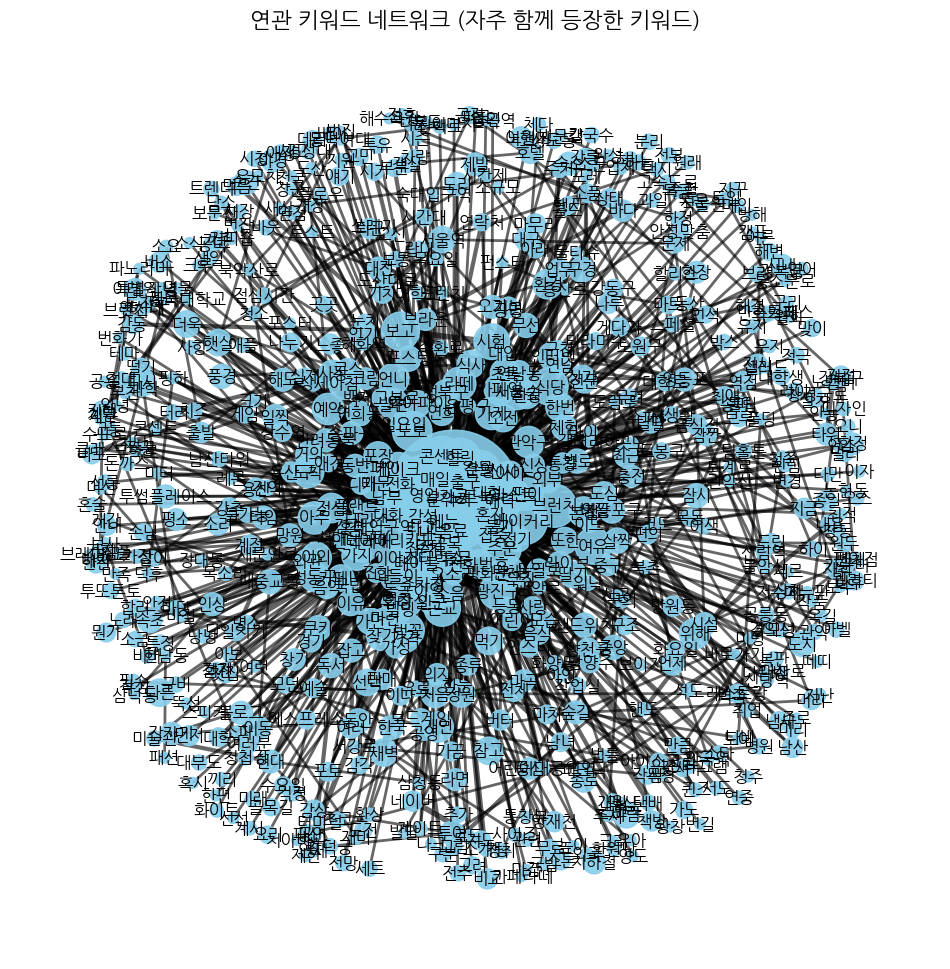

In [ ]:
## 조건 없이 등장한 모든 단어를 사용해 연관 키워드 네트워크(불필요한 단어도 많이 추출됨)

import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import matplotlib.font_manager as fm
import platform

# 플랫폼에 맞는 폰트 설정
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'
else:
    font_name = 'NanumGothic'

plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 각 텍스트(description)에서 명사만 추출 (불용어 제외 + 한 글자 제외)
desc_nouns_list = []
for desc in descriptions:
    nouns = [word for word in okt.nouns(desc) if word not in stopwords and len(word) > 1]
    desc_nouns_list.append(nouns)

# 각 문장에서 명사쌍(조합)을 생성 (동시 출현 단어쌍)
edges = []
for nouns in desc_nouns_list:
    edges += list(combinations(set(nouns), 2))  # 중복 제거(set), 두 단어씩 조합

# 단어쌍이 얼마나 자주 같이 나왔는지 세기
edge_counts = Counter(edges)

# 2회 이상 함께 등장한 단어쌍만 필터링
filtered_edges = {k: v for k, v in edge_counts.items() if v >= 2}

# 네트워크 그래프 생성
G = nx.Graph()
for (n1, n2), v in filtered_edges.items():
    G.add_edge(n1, n2, weight=v)  # 단어쌍을 엣지로 추가, 등장횟수를 weight로

# 폰트 재설정
if platform.system() == 'Windows':
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)

# 시각화
plt.figure(figsize=(12, 12))  # 그래프 크기
pos = nx.spring_layout(G, k=0.5, seed=42)  # 레이아웃 설정 (노드 간 거리 균형 조절)

# 노드 크기는 전체 등장 빈도 기준으로 설정
node_sizes = [word_counts.get(node, 1) * 30 for node in G.nodes()]

# 노드, 엣지, 라벨 시각화
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] for u, v in G.edges()], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='NanumGothic')

plt.title("연관 키워드 네트워크 (자주 함께 등장한 키워드)", fontsize=16)
plt.axis('off')  # 축 제거
plt.show()

불용어 처리로 정제된 명사를 이용해 연관 키워드 네트워크

In [ ]:
from konlpy.tag import Okt

# 형태소 분석기 준비
okt = Okt()

# 명사 리스트만 추출해서 담을 리스트
processed_texts = []

for result in all_results:
    text = result['description']
    nouns = okt.nouns(text)  # 명사만 추출
    filtered_nouns = [n for n in nouns if len(n) > 1]  # 한 글자 제거
    processed_texts.append(filtered_nouns)

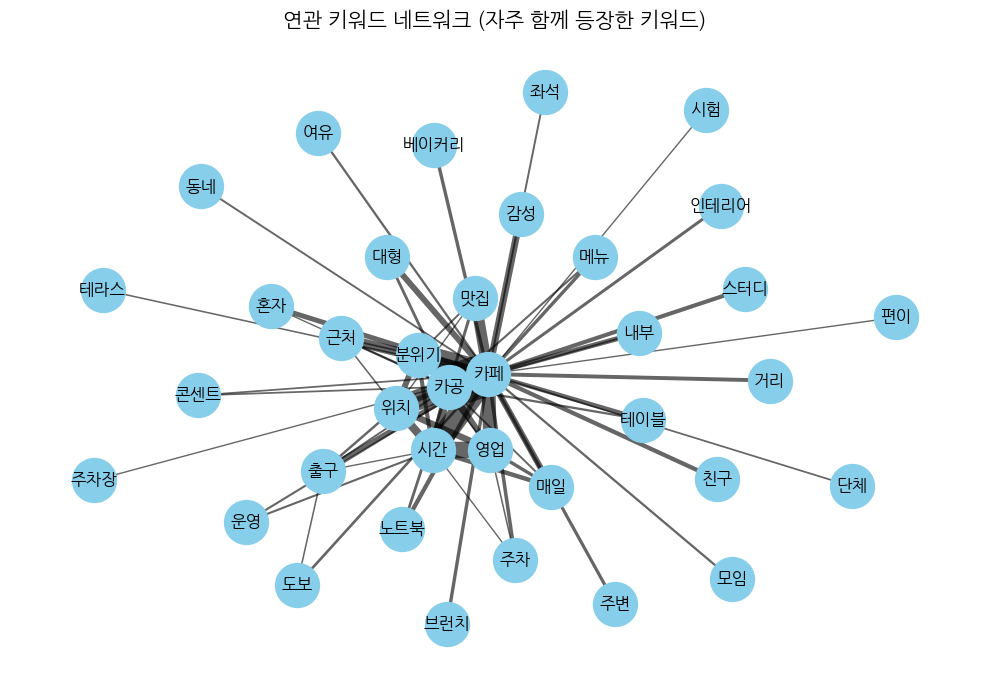

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import matplotlib.font_manager as fm
import numpy as np

# 불용어 리스트 정의
stopwords = [
    '하나', '수다', '무엇', '학교', '구역', '경험', '회의', '모든', '우선', '진심','모두','다른','마포구', '저녁', '매장', '코스', '아주',
    '시작', '우유', '자주', '사용', '최고', '자연', '접근성', '느낌', '성수', '강남','날씨','다음', '음료', '산책', '식당', '관악구', '휴무',
    '월요일', '여름', '노홍', '스카', '오픈', '주소', '사실', '집중', '가기', '서울','지하','다른', '장소', '조금', '방문', '정도', '발견', '생각',
    '공간', '오늘', '소개', '공부', '자리', '작업', '역시', '정말', '진짜', '약간','거나','추천','하루', '루프', '이야기', '건대', '광진구','부산',
    '그냥', '이런', '저런', '엄마', '우리', '가족', '수업', '여행', '기억', '문화','데이트','오기', '가면', '셀렉', '티드', '닉스', '힐링', '케이크',
    '기간', '학생', '교수', '입구', '사진', '제일', '후기', '예전', '마음', '바로', '공원','서울특별시', '정기', '보고', '기도', '기분', '주문', '덕분',
    '선물', '완전', '평일', '주말', '요즘', '딸', '테헤란로', '서울대','언니', '사람','여기','컨셉', '카페인','이용', '정보', '근교', '골목',
    '연대', '동대문', '압구정', '강남구', '강남역', '성수동', '라운지', '노벤버', '안쪽', '참고', '디저트', '커피', '이번', '매력', '서울숲'
]

# 전처리된 텍스트 리스트에서 불용어 제거
filtered_texts = [
    [word for word in text if word not in stopwords and len(word) > 1]
    for text in processed_texts
]

# Co-occurrence 계산
pair_counts = Counter()
for text in filtered_texts:
    pairs = combinations(set(text), 2)
    pair_counts.update(pairs)

# 필터링 (동시 출현 횟수 기준)
filtered_pairs = {pair: count for pair, count in pair_counts.items() if count >= 15}

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 네트워크 그래프 생성
G = nx.Graph()
for (word1, word2), count in filtered_pairs.items():
    G.add_edge(word1, word2, weight=count)

# 시각화
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5, seed=42)

# 간선 가중치 가져오기
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

min_log = min(edge_weights)
max_log = max(edge_weights)
edge_widths = [(w - min_log) / (max_log - min_log) * 30 + 1 for w in edge_weights]

# 노드, 간선, 레이블 그리기
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='NanumGothic')

plt.title("연관 키워드 네트워크 (자주 함께 등장한 키워드)", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 라이브러리 설치: networkx(네트워크 분석 및 시각화), pyvis(네트워크 시각화), transformers(자연어 처리 모델)
!pip install networkx pyvis transformers

In [ ]:
# 라이브러리 설치: requests(HTTP 요청), beautifulsoup4(HTML 파싱), pandas(데이터 분석 및 처리)
!pip install requests beautifulsoup4 pandas

## 리뷰 기반 Sentiment Analysis 분석

In [ ]:
import requests
import re
from datetime import datetime
import time
import pandas as pd

# 네이버 오픈 API 인증 정보
client_id = '3AgZBzo72nWXy102nv0V'
client_secret = 'nCUZjCcted'

# 검색할 키워드 목록
keywords = [
    '서울 카공 추천 카페',
    '서울 카공하기 좋은 카페',
    '서울 공부하기 좋은 카페',
    '서울 조용한 카페'
]

# 요청 헤더
headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# HTML 태그와 특수문자 제거 함수
def clean_text(text):
    text = re.sub('<.*?>', '', text)  # HTML 태그 제거
    text = text.replace('&quot;', '"').replace('&amp;', '&')
    return text

# 결과 저장 리스트
all_reviews = []

# 키워드별로 검색
for keyword in keywords:
    print(f"▶ {keyword} 수집 중...")

    for start in range(1, 1000, 100):  # 최대 1000건까지
        url = 'https://openapi.naver.com/v1/search/blog.json'
        params = {
            'query': keyword,
            'display': 100,
            'start': start,
            'sort': 'date'  # 최신순
        }

        # 요청 보내기
        response = requests.get(url, headers=headers, params=params)
        time.sleep(0.5)  # 과호출 방지

        if response.status_code == 200:
            items = response.json().get('items', [])

            if not items:  # 더 이상 결과 없으면 중단
                break

            for item in items:
                description = clean_text(item.get('description', ''))  # description만 뽑기
                if description:  # 비어있지 않으면 저장
                    all_reviews.append({
                        'keyword': keyword,
                        'review': description,
                        'link': item.get('link'),
                        'date': datetime.strptime(item['postdate'], '%Y%m%d').strftime('%Y-%m-%d')
                    })
        else:
            print(f"Error {response.status_code}: {response.text}")
            break

# 결과 확인
print(f"\n총 {len(all_reviews)}개의 리뷰가 수집되었습니다.")

# DataFrame 변환
df = pd.DataFrame(all_reviews)

# 중복 제거
before = len(df)
df = df.drop_duplicates(subset=['review'])
after = len(df)

print(f"중복 제거 후 리뷰 개수: {after}개")

▶ 서울 카공 추천 카페 수집 중...
▶ 서울 카공하기 좋은 카페 수집 중...
▶ 서울 공부하기 좋은 카페 수집 중...
▶ 서울 조용한 카페 수집 중...

총 4000개의 리뷰가 수집되었습니다.
중복 제거 후 리뷰 개수: 3951개


In [ ]:
import pandas as pd
import re
import time
from transformers import pipeline, AutoTokenizer

# 분석할 리뷰 50개만 샘플링
sample_reviews = df['review'].sample(n=50, random_state=42).tolist()  # 랜덤 50개 추출

# 감성 분석 모델과 토크나이저 로드
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline("sentiment-analysis", model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 부정적인 단어 목록
negative_words = ['시끄러워', '어두워', '힘들었어요', '불편']

# 토큰 기준으로 텍스트 자르기
def truncate_text_to_token_limit(text, max_tokens=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_tokens, return_tensors=None)
    decoded_text = tokenizer.decode(tokens, skip_special_tokens=True)
    return decoded_text

# 감성 분석 함수
def analyze_sentiment_with_adjustment(text):
    text = truncate_text_to_token_limit(text)
    result = classifier(text)
    sentiment = result[0]['label']

    if any(neg_word in text for neg_word in negative_words):
        sentiment = "NEGATIVE"

    return sentiment

# 감성 분석 실행
for review in sample_reviews:
    sentiment = analyze_sentiment_with_adjustment(review)
    print(f"리뷰: {review}\n감성 분석: {sentiment}\n")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


리뷰: 카페에서 책을 읽고 싶은 날이 있다:) 그런날, 연희동에 위치한 동경책방을 추천한다. 동경책방 서울... 연희동책방카페 #연희동조용한카페 #연희동카페 #연남동카페추천 #동경책방 #연희동동경책방
감성 분석: POSITIVE

리뷰: 누나도 저러는걸 보니 꼭 좋은 가시적 성과가 있을것이라고 생각한다. (참고로 나는 마지막에 엄처어엉난 운이 따라서 성과가 생긴거지 개판이었다) 저녁 늦게 성현이와 만나서 늘 가는 카페(그곳에 하도... 
감성 분석: POSITIVE

리뷰: 문화 서울 마포구 서교동 402-3 B1 12:00 - 22:00 지하로 내려오면 이렇게 귀여운 빈티지의류들이 보이고 MD도... 찍기도 좋은 합정역 카페 문화 Munhwa 2인석 카공하기 좋아 보이네요 바닥에 6구 콘센트도 있어요! 옷... 
감성 분석: POSITIVE

리뷰: 셀렉티드닉스 서울 강남구 테헤란로4길 37 1층 강남역 루프탑 카페 찾고 계신다면 여기 정말 추천해요.... 쾌적해서 카공하러 오는 사람도 많이 보였어요 중고등학생으로 보이는 분들 대학생도 오셔서 책 보고... 
감성 분석: POSITIVE

리뷰: 메뉴판 공부하기 좋은 카페일 뿐 아니라 음료도 맛있고 커피도 종류도 다양했다 칵테일도 있었음..!!... 찾는다면 추천드립니당 #합정카공 #합정노트북카페 #합정디저트맛집 #합정케이크맛집 #서울공부하기좋은카페
감성 분석: POSITIVE

리뷰: 그곳은 '두젠틀'이라는 강아지 카페로 서울 역삼동에 위치한 곳이었어요. 역삼역이 더 가깝긴 했으나... 강아지들은 활발하게 뛰어다니며 사람들에게 귀여움을 한껏 발산하였고, 어떤 강아지들은 조용한 구석에... 
감성 분석: POSITIVE

리뷰: 주차할 공간도 있어서 좋은것 같아요!! 내부시설 검은색 모노톤에 깔끔하고 엄청 커요!! 완전 세련된 감성 카페이면서도 긴 탁상 테이블이 있어서 카공하기도 좋아보였어요 24시간 카페니까 어떤 목적이든지... 
감성 분석: POSITIVE

리뷰: 진짜 우리 같이 서울에서 장사해요^^ 타